## Linear Regression Example

Data Source: https://www.gapminder.org/data/<br/>

The Gapminder data has 10 features per sample (9 numeric, 1 categorical).  We first draw a scatter plot that plots fertility vs. life expectancy based on out training data.  We then fit a linear regression model to predict life expectancy based on fertility.  We plot the predicted line over our scatter plot to visualize it.<br/>

Before training a linear regression model using all our features, we need to turn "Region" from a categorical attribute to a numerical attribute (linear regression works only with numerical features).  Once we do that, we train a linear regression model using 70% of our samples, then test on the remaining 30%.  We calculate the root mean squared error on the test predictions.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('sample_data/gapminder.csv')

In [3]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [5]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [6]:
df[5:6]

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
5,8331465.0,1.41,0.3,8.18316,26.46741,43952.0,124.1394,80.4,4.6,Europe & Central Asia


In [7]:
df.shape # 139 observations, 10 features

(139, 10)

In [8]:
fertility = df['fertility'].values
life = df['life'].values

In [9]:
fertility[0:5]

array([ 2.73,  6.43,  2.24,  1.4 ,  1.96])

In [10]:
type(fertility)

numpy.ndarray

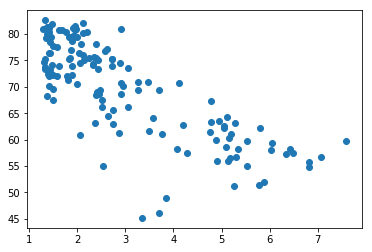

In [11]:
# Draw a scatter plot that shows fertility vs. life expectancy
# Note that lower fertility seems to be correlated with higher life expectancy
# In any case, we can spot a linear relationship between the two features
import matplotlib.pyplot as plt

plt.scatter(fertility, life)
plt.show()

In [12]:
# Let's try to fit a linear regression model based on just one feature, fertility, to predict life expectancy
from sklearn.linear_model import LinearRegression

X_fertility = (df['fertility'].values).reshape(-1, 1)
y = df['life'].values

reg = LinearRegression()

# Let's create out prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1, 1)

# Let's fit our data
reg.fit(X_fertility, y)

# Let's get predictions for our prediction space
y_pred = reg.predict(prediction_space)

In [13]:
r_square_score = reg.score(X_fertility, y)
print(r_square_score)

0.619244216774


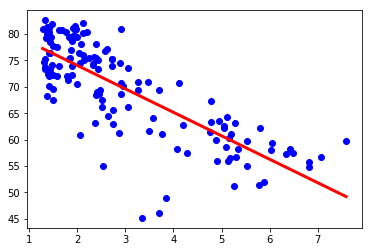

In [14]:
# Let's superimpose the line that our linear regressor came up with on top of the training data
plt.scatter(fertility, life, color="blue")
plt.plot(prediction_space, y_pred, color="red", linewidth=3)
plt.show()

### Training and Testing Sets

#### Convert column from non-numerical to numerical

In [15]:
# The data contains a non-numerical feature, "Region", that needs to be converted to numerical format 
# if we're going to feed it to our linear regressor.
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

X = df.drop(['life'], axis=1)
regions = df['Region']
le.fit(regions)
print(list(le.classes_))
regions_num = le.transform(regions)
print(regions_num)

X['Regions_Num'] = regions_num
X = X.drop(['Region'], axis=1)
X.info()

['America', 'East Asia & Pacific', 'Europe & Central Asia', 'Middle East & North Africa', 'South Asia', 'Sub-Saharan Africa']
[3 5 0 2 1 2 2 0 4 0 2 2 0 5 4 0 5 0 2 5 5 1 5 0 5 0 0 5 5 0 5 2 0 2 3 0 3
 0 5 5 2 1 2 2 5 5 2 2 5 2 0 5 5 0 0 0 2 2 4 1 3 2 3 2 0 1 2 5 2 3 5 5 2 2
 5 5 1 4 5 2 5 5 0 2 1 3 5 1 4 2 1 0 5 5 2 3 4 0 1 0 0 1 2 2 3 2 2 5 5 2 5
 1 2 2 5 5 2 4 5 0 5 2 2 2 5 1 5 0 3 2 5 2 2 0 0 2 1 5 5]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
child_mortality    139 non-null float64
Regions_Num        139 non-null int64
dtypes: float64(8), int64(1)
memory usage: 9.9 KB


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#X = df.drop(['life'], axis=1)
y = df['life'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8376147251418998
Root Mean Squared Error: 3.2519310654111186
